In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from mpl_toolkits import mplot3d
import numpy as np
import  matplotlib.pyplot as plt
import seaborn as sns

/home/matteo/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [4]:
table = pd.read_csv('2017.csv')

In [5]:
table.columns

Index(['Date', 'Home Team Name', 'Away Team Name', 'Home Team ID',
       'Away Team ID', 'Neutral', 'Location', 'Zipcode', 'Tournament',
       'Special', 'Home FG Made', 'Away FG Made', 'Home FG Attempt',
       'Away FG Attempt', 'Home FG Percentage', 'Away FG Percentage',
       'Home 3PT Made', 'Away 3PT Made', 'Home 3PT Attempt',
       'Away 3PT Attempt', 'Home 3PT Percentage', 'Away 3PT Percentage',
       'Home FT Made', 'Away FT Made', 'Home FT Attempt', 'Away FT Attempt',
       'Home FT Percentage', 'Away FT Percentage', 'Home OREB', 'Away OREB',
       'Home DREB', 'Away DREB', 'Home TREB', 'Away TREB', 'Home REB',
       'Away REB', 'Home AST', 'Away AST', 'Home STL', 'Away STL', 'Home BLK',
       'Away BLK', 'Home TO', 'Away TO', 'Home PF', 'Away PF', 'Home TF',
       'Away TF', 'Home FF', 'Away FF', 'Home PTS', 'Away PTS'],
      dtype='object')

In [6]:
table

,Date,Home Team Name,Away Team Name,Home Team ID,Away Team ID,Neutral,Location,Zipcode,Tournament,Special,...,Home TO,Away TO,Home PF,Away PF,Home TF,Away TF,Home FF,Away FF,Home PTS,Away PTS
0,11/10/17,Davidson,Charleston Southern,2166,2127,False,"Davidson, NC",28036.0,False,False,...,1,14,12,17,0,0,0,0,110,62
1,11/10/17,Dayton,Ball State,2168,2050,False,"Dayton, OH",45490.0,False,False,...,11,12,15,19,0,0,0,0,78,77
2,11/10/17,Fordham,Miami (OH),2230,193,False,"Bronx, NY",NaN,False,False,...,9,21,17,17,0,0,0,0,54,55
3,11/10/17,George Mason,Lafayette,2244,322,False,"Fairfax, VA",22038.0,False,False,...,11,14,10,18,0,0,0,0,67,65
4,11/10/17,VCU,Grambling,2670,2755,False,"Richmond, VA",23298.0,False,False,...,11,12,23,17,0,0,0,0,94,65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5865,3/11/18,Rhode Island,Davidson,227,2166,True,"Washington, DC",20599.0,True,False,...,14,12,16,14,0,0,0,0,57,58
5866,3/11/18,Cincinnati,Houston,2132,248,True,"Orlando, FL",32899.0,True,False,...,13,12,13,19,0,0,0,0,56,55
5867,3/11/18,Harvard,Pennsylvania,108,219,True,"Philadelphia, PA",19255.0,True,False,...,8,7,17,14,0,0,0,0,65,68
5868,3/11/18,Tennessee,Kentucky,2633,96,True,"St. Louis, MO",63199.0,True,False,...,10,10,21,19,0,0,0,0,72,77


In [7]:
home_pts = table['Home PTS']
away_pts = table['Away PTS']

In [8]:
# Define bin edges for home team points and away team points
home_bin_edges = np.arange(0, 150, 10)  # Adjust as needed
away_bin_edges = np.arange(0, 150, 10)  # Adjust as needed

In [9]:
# Create histograms for home and away teams
home_scores, _ = np.histogram(home_pts, bins=home_bin_edges)
away_scores, _ = np.histogram(away_pts, bins=away_bin_edges)

In [10]:
# Create an empty DataFrame
index_labels = [f'{bin_start}-{bin_end-1}' for bin_start, bin_end in zip(home_bin_edges[:-1], home_bin_edges[1:])]
column_labels = [f'{bin_start}-{bin_end-1}' for bin_start, bin_end in zip(away_bin_edges[:-1], away_bin_edges[1:])]

df = pd.DataFrame(index=index_labels, columns=column_labels)

# Fill in the DataFrame with the counts
for i, home_bin in enumerate(home_bin_edges[:-1]):
    for j, away_bin in enumerate(away_bin_edges[:-1]):
        count = np.sum((home_pts >= home_bin) & (home_pts < home_bin_edges[i + 1]) & 
                       (away_pts >= away_bin) & (away_pts < away_bin_edges[j + 1]))
        df.iloc[i, j] = count


In [11]:
df

,0-9,10-19,20-29,30-39,40-49,50-59,60-69,70-79,80-89,90-99,100-109,110-119,120-129,130-139
0-9,2,0,0,0,0,0,0,0,0,0,0,0,0,0
10-19,0,0,0,0,0,0,0,0,0,0,0,0,0,0
20-29,0,0,0,0,0,0,0,0,0,0,0,0,0,0
30-39,0,0,0,0,1,2,2,0,0,0,0,0,0,0
40-49,0,0,0,1,6,16,28,13,2,0,0,0,0,0
50-59,0,0,0,1,14,98,153,95,46,7,0,0,0,0
60-69,0,0,0,3,66,247,393,357,102,24,2,0,0,0
70-79,0,0,0,8,63,310,604,477,269,45,8,0,0,0
80-89,0,0,0,5,50,178,371,486,252,106,15,1,0,0
90-99,0,0,1,4,25,80,134,151,154,52,19,0,0,0


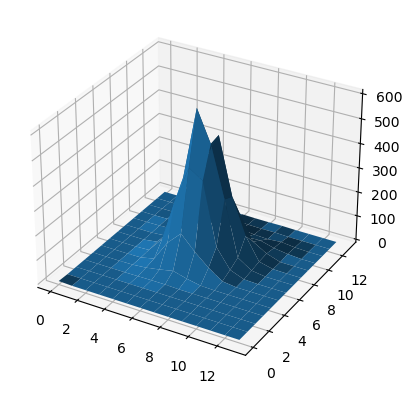

In [12]:
fig = plt.figure()

ax = plt.axes(projection = '3d')

X, Y = np.meshgrid(range(df.shape[1]), range(df.shape[0]))
z = df.values.astype(float)

ax.plot_surface(X, Y, z)

In [44]:
array = []
total_games = sum(sum(df.values))
for i in df.values:
    array.append(list(i/total_games))
df_prob = pd.DataFrame(array, columns = df.columns, index = df.index)
df_prob

,10.0,20.0,30.0,40.0,50.0,60.0,70.0,80.0,90.0,100.0,110.0,120.0,130.0,140.0
10.0,0.000341,0.0,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
20.0,0.000000,0.0,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
30.0,0.000000,0.0,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
40.0,0.000000,0.0,0.00000,0.000000,0.000170,0.000341,0.000341,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
50.0,0.000000,0.0,0.00000,0.000170,0.001022,0.002726,0.004771,0.002215,0.000341,0.000000,0.000000,0.000000,0.0,0.0
60.0,0.000000,0.0,0.00000,0.000170,0.002385,0.016698,0.026069,0.016187,0.007838,0.001193,0.000000,0.000000,0.0,0.0
70.0,0.000000,0.0,0.00000,0.000511,0.011246,0.042086,0.066962,0.060828,0.017379,0.004089,0.000341,0.000000,0.0,0.0
80.0,0.000000,0.0,0.00000,0.001363,0.010734,0.052820,0.102914,0.081274,0.045834,0.007667,0.001363,0.000000,0.0,0.0
90.0,0.000000,0.0,0.00000,0.000852,0.008519,0.030329,0.063213,0.082808,0.042937,0.018061,0.002556,0.000170,0.0,0.0
100.0,0.000000,0.0,0.00017,0.000682,0.004260,0.013631,0.022832,0.025728,0.026240,0.008860,0.003237,0.000000,0.0,0.0


In [45]:
indices = np.linspace(10,140,14)
df_prob.index = indices
df_prob.columns = indices

In [46]:
output = "Max Value is {} at with home team scoring {} and away team scoring {}".format(df_prob.values.max(), df_prob.index[7], df_prob.index[6])
print(output)

Max Value is 0.10291361390356109 at with home team scoring 80.0 and away team scoring 70.0


<AxesSubplot:>

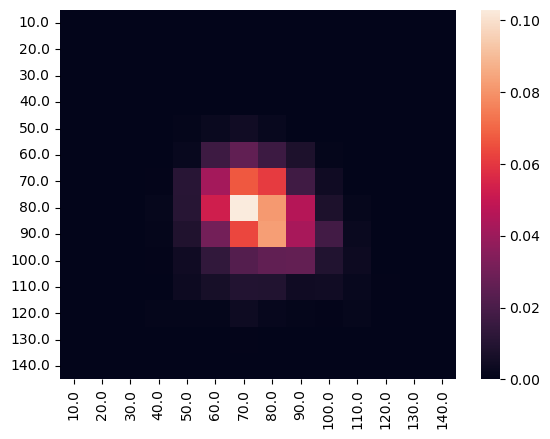

In [47]:
sns.heatmap(df_prob)

# Break into Games

In [70]:
table

,Date,Home Team Name,Away Team Name,Home Team ID,Away Team ID,Neutral,Location,Zipcode,Tournament,Special,...,Home TO,Away TO,Home PF,Away PF,Home TF,Away TF,Home FF,Away FF,Home PTS,Away PTS
0,11/10/17,Davidson,Charleston Southern,2166,2127,False,"Davidson, NC",28036.0,False,False,...,1,14,12,17,0,0,0,0,110,62
1,11/10/17,Dayton,Ball State,2168,2050,False,"Dayton, OH",45490.0,False,False,...,11,12,15,19,0,0,0,0,78,77
2,11/10/17,Fordham,Miami (OH),2230,193,False,"Bronx, NY",NaN,False,False,...,9,21,17,17,0,0,0,0,54,55
3,11/10/17,George Mason,Lafayette,2244,322,False,"Fairfax, VA",22038.0,False,False,...,11,14,10,18,0,0,0,0,67,65
4,11/10/17,VCU,Grambling,2670,2755,False,"Richmond, VA",23298.0,False,False,...,11,12,23,17,0,0,0,0,94,65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5865,3/11/18,Rhode Island,Davidson,227,2166,True,"Washington, DC",20599.0,True,False,...,14,12,16,14,0,0,0,0,57,58
5866,3/11/18,Cincinnati,Houston,2132,248,True,"Orlando, FL",32899.0,True,False,...,13,12,13,19,0,0,0,0,56,55
5867,3/11/18,Harvard,Pennsylvania,108,219,True,"Philadelphia, PA",19255.0,True,False,...,8,7,17,14,0,0,0,0,65,68
5868,3/11/18,Tennessee,Kentucky,2633,96,True,"St. Louis, MO",63199.0,True,False,...,10,10,21,19,0,0,0,0,72,77


In [74]:
table.to_csv("games.csv")

In [73]:
len(table['Home Team Name'].unique())

354